![imagen](./img/eda_banner.png)

# Evolución de géneros de videojuegos publicados en la plataforma Steam

# Preparamos los datos

### Importamos todas las librerías necesarias

In [2]:
# Importamos todas las librerías necesarias

import numpy as np
import pandas as pd

# Herramientas de visualización
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
#import plotly as py

from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Cargamos el primer dataset

In [3]:
# Cargamos la primera base de datos en crudo

df_raw= pd.read_csv("data/steam_app_data.csv", sep= ",")

In [4]:
# Comprobamos el dataframe generado para ver más o menos qué tenemos

df_raw.head()

,type,name,steam_appid,required_age,is_free,controller_support,dlc,detailed_description,about_the_game,short_description,...,categories,genres,screenshots,movies,recommendations,achievements,release_date,support_info,background,content_descriptors
0,game,Counter-Strike,10,0.0,False,NaN,NaN,Play the world's number 1 online action game. ...,Play the world's number 1 online action game. ...,Play the world's number 1 online action game. ...,...,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://steamcdn...",NaN,{'total': 65735},{'total': 0},"{'coming_soon': False, 'date': '1 Nov, 2000'}","{'url': 'http://steamcommunity.com/app/10', 'e...",https://steamcdn-a.akamaihd.net/steam/apps/10/...,"{'ids': [2, 5], 'notes': 'Includes intense vio..."
1,game,Team Fortress Classic,20,0.0,False,NaN,NaN,One of the most popular online action games of...,One of the most popular online action games of...,One of the most popular online action games of...,...,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://steamcdn...",NaN,{'total': 2802},{'total': 0},"{'coming_soon': False, 'date': '1 Apr, 1999'}","{'url': '', 'email': ''}",https://steamcdn-a.akamaihd.net/steam/apps/20/...,"{'ids': [2, 5], 'notes': 'Includes intense vio..."
2,game,Day of Defeat,30,0.0,False,NaN,NaN,Enlist in an intense brand of Axis vs. Allied ...,Enlist in an intense brand of Axis vs. Allied ...,Enlist in an intense brand of Axis vs. Allied ...,...,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://steamcdn...",NaN,{'total': 1992},{'total': 0},"{'coming_soon': False, 'date': '1 May, 2003'}","{'url': '', 'email': ''}",https://steamcdn-a.akamaihd.net/steam/apps/30/...,"{'ids': [], 'notes': None}"
3,game,Deathmatch Classic,40,0.0,False,NaN,NaN,Enjoy fast-paced multiplayer gaming with Death...,Enjoy fast-paced multiplayer gaming with Death...,Enjoy fast-paced multiplayer gaming with Death...,...,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://steamcdn...",NaN,{'total': 931},{'total': 0},"{'coming_soon': False, 'date': '1 Jun, 2001'}","{'url': '', 'email': ''}",https://steamcdn-a.akamaihd.net/steam/apps/40/...,"{'ids': [], 'notes': None}"
4,game,Half-Life: Opposing Force,50,0.0,False,NaN,NaN,Return to the Black Mesa Research Facility as ...,Return to the Black Mesa Research Facility as ...,Return to the Black Mesa Research Facility as ...,...,"[{'id': 2, 'description': 'Single-player'}, {'...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://steamcdn...",NaN,{'total': 4355},{'total': 0},"{'coming_soon': False, 'date': '1 Nov, 1999'}","{'url': 'https://help.steampowered.com', 'emai...",https://steamcdn-a.akamaihd.net/steam/apps/50/...,"{'ids': [], 'notes': None}"


In [5]:
# Hacemos un .info() para ver los valores nulos
# Vemos que puede haber un problema aquí, tenemos muchos IDs (la referencia que usaremos) que no tienen ni siquiera un nombre asignado

df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29235 entries, 0 to 29234
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   type                     29086 non-null  object 
 1   name                     29234 non-null  object 
 2   steam_appid              29235 non-null  int64  
 3   required_age             29086 non-null  float64
 4   is_free                  29086 non-null  object 
 5   controller_support       5998 non-null   object 
 6   dlc                      4975 non-null   object 
 7   detailed_description     29060 non-null  object 
 8   about_the_game           29060 non-null  object 
 9   short_description        29060 non-null  object 
 10  fullgame                 0 non-null      float64
 11  supported_languages      29072 non-null  object 
 12  header_image             29086 non-null  object 
 13  website                  19252 non-null  object 
 14  pc_requirements       

In [6]:
# Esto también nos puede suponer un problema...
# Una comprobación rápida del dataset nos permite ver que hay efectivamente filas repetidas

id_duplicado= df_raw["steam_appid"].duplicated().sum()
nombre_duplicado= df_raw["name"].duplicated().sum()

print(f"El dataset contiene {id_duplicado} números de ID duplicados.")
print(f"El dataset contiene {nombre_duplicado} nombres de juegos duplicados.")


El dataset contiene 7 números de ID duplicados.
El dataset contiene 150 nombres de juegos duplicados.


### Limpiamos el primer dataset

##### Eliminamos las columnas que no nos interesan

In [7]:
# Limpiamos el dataset para quedarnos solo con las columnas que nos interesan

df_raw.columns

Index(['type', 'name', 'steam_appid', 'required_age', 'is_free',
       'controller_support', 'dlc', 'detailed_description', 'about_the_game',
       'short_description', 'fullgame', 'supported_languages', 'header_image',
       'website', 'pc_requirements', 'mac_requirements', 'linux_requirements',
       'legal_notice', 'drm_notice', 'ext_user_account_notice', 'developers',
       'publishers', 'demos', 'price_overview', 'packages', 'package_groups',
       'platforms', 'metacritic', 'reviews', 'categories', 'genres',
       'screenshots', 'movies', 'recommendations', 'achievements',
       'release_date', 'support_info', 'background', 'content_descriptors'],
      dtype='object')

### Cargamos el segundo dataset

In [8]:
# Cargamos el segundo dataset

df2_raw= pd.read_csv("data/steamspy_data.csv", sep= ",")
df2_raw

,appid,name,developer,publisher,score_rank,positive,negative,userscore,owners,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,discount,languages,genre,ccu,tags
0,10,Counter-Strike,Valve,Valve,NaN,124534,3339,0,"10,000,000 .. 20,000,000",17612,709,317,26,999.0,999.0,0.0,"English, French, German, Italian, Spanish - Sp...",Action,14923,"{'Action': 2681, 'FPS': 2048, 'Multiplayer': 1..."
1,20,Team Fortress Classic,Valve,Valve,NaN,3318,633,0,"5,000,000 .. 10,000,000",277,15,62,15,499.0,499.0,0.0,"English, French, German, Italian, Spanish - Sp...",Action,87,"{'Action': 208, 'FPS': 188, 'Multiplayer': 172..."
2,30,Day of Defeat,Valve,Valve,NaN,3416,398,0,"5,000,000 .. 10,000,000",187,0,34,0,499.0,499.0,0.0,"English, French, German, Italian, Spanish - Spain",Action,130,"{'FPS': 138, 'World War II': 122, 'Multiplayer..."
3,40,Deathmatch Classic,Valve,Valve,NaN,1273,267,0,"5,000,000 .. 10,000,000",258,0,184,0,499.0,499.0,0.0,"English, French, German, Italian, Spanish - Sp...",Action,4,"{'Action': 85, 'FPS': 71, 'Multiplayer': 58, '..."
4,50,Half-Life: Opposing Force,Gearbox Software,Valve,NaN,5250,288,0,"5,000,000 .. 10,000,000",624,0,415,0,499.0,499.0,0.0,"English, French, German, Korean",Action,71,"{'FPS': 235, 'Action': 211, 'Sci-fi': 166, 'Si..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29230,1065230,Room of Pandora,SHEN JIAWEI,SHEN JIAWEI,NaN,3,0,0,"0 .. 20,000",0,0,0,0,254.0,299.0,15.0,"English, Japanese, Simplified Chinese, Traditi...","Adventure, Casual, Indie",0,"{'Adventure': 21, 'Indie': 21, 'Casual': 21, '..."
29231,1065570,Cyber Gun,Semyon Maximov,BekkerDev Studio,NaN,8,1,0,"0 .. 20,000",0,0,0,0,119.0,199.0,40.0,English,"Action, Adventure, Indie",1,"{'Action': 21, 'Indie': 21, 'Adventure': 20, '..."
29232,1065650,Super Star Blast,EntwicklerX,EntwicklerX,NaN,0,1,0,"0 .. 20,000",0,0,0,0,424.0,499.0,15.0,English,"Action, Casual, Indie",0,"{'Action': 21, 'Indie': 21, 'Casual': 21}"
29233,1066700,New Yankee 7: Deer Hunters,Yustas Game Studio,Alawar Entertainment,NaN,2,0,0,"0 .. 20,000",0,0,0,0,699.0,699.0,0.0,"English, German, Korean, Russian","Adventure, Casual, Indie",1,"{'Indie': 21, 'Casual': 21, 'Adventure': 20}"


In [9]:
df2_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29235 entries, 0 to 29234
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   appid            29235 non-null  int64  
 1   name             29230 non-null  object 
 2   developer        29037 non-null  object 
 3   publisher        28939 non-null  object 
 4   score_rank       58 non-null     float64
 5   positive         29235 non-null  int64  
 6   negative         29235 non-null  int64  
 7   userscore        29235 non-null  int64  
 8   owners           29235 non-null  object 
 9   average_forever  29235 non-null  int64  
 10  average_2weeks   29235 non-null  int64  
 11  median_forever   29235 non-null  int64  
 12  median_2weeks    29235 non-null  int64  
 13  price            29206 non-null  float64
 14  initialprice     29213 non-null  float64
 15  discount         29213 non-null  float64
 16  languages        29141 non-null  object 
 17  genre       

In [10]:
# Comprobamos el número de elementos duplicados del segundo dataset

id_duplicado_2= df2_raw["appid"].duplicated().sum()
nombre_duplicado_2= df2_raw["name"].duplicated().sum()

print(f"El dataset tiene {id_duplicado_2} números de ID duplicados")
print(f"El dataset tiene {nombre_duplicado_2} nombres de juegos duplicados")
print()

if id_duplicado == id_duplicado_2:
    print("El número de IDs duplicados en los dos datasets coincide.")
else: print("El número de IDs duplicados en los dos datasets no coincide.")

if nombre_duplicado == nombre_duplicado_2:
    print("El número de nombres de juegos duplicados coincide.")
else: print("El número de nombres de juegos duplicados no coincide.")

El dataset tiene 0 números de ID duplicados
El dataset tiene 77 nombres de juegos duplicados

El número de IDs duplicados en los dos datasets no coincide.
El número de nombres de juegos duplicados no coincide.


### Limpiamos el segundo dataset

##### Eliminamos las columnas que no nos interesan

In [11]:
df2_raw.columns

Index(['appid', 'name', 'developer', 'publisher', 'score_rank', 'positive',
       'negative', 'userscore', 'owners', 'average_forever', 'average_2weeks',
       'median_forever', 'median_2weeks', 'price', 'initialprice', 'discount',
       'languages', 'genre', 'ccu', 'tags'],
      dtype='object')

##### Cambiamos el nombre a la columna clave ID para simplificar el merge

In [12]:
# Cambiamos el nombre a la columna appid del dataset 2 para que coincida con la columna steam_appid del dataset 1
# Esto debería simplificar el proceso de unir de forma segura los dos datasets

df2_raw= df2_raw.rename(columns={"appid": "steam_appid"})
df2_raw.head()

,steam_appid,name,developer,publisher,score_rank,positive,negative,userscore,owners,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,discount,languages,genre,ccu,tags
0,10,Counter-Strike,Valve,Valve,NaN,124534,3339,0,"10,000,000 .. 20,000,000",17612,709,317,26,999.0,999.0,0.0,"English, French, German, Italian, Spanish - Sp...",Action,14923,"{'Action': 2681, 'FPS': 2048, 'Multiplayer': 1..."
1,20,Team Fortress Classic,Valve,Valve,NaN,3318,633,0,"5,000,000 .. 10,000,000",277,15,62,15,499.0,499.0,0.0,"English, French, German, Italian, Spanish - Sp...",Action,87,"{'Action': 208, 'FPS': 188, 'Multiplayer': 172..."
2,30,Day of Defeat,Valve,Valve,NaN,3416,398,0,"5,000,000 .. 10,000,000",187,0,34,0,499.0,499.0,0.0,"English, French, German, Italian, Spanish - Spain",Action,130,"{'FPS': 138, 'World War II': 122, 'Multiplayer..."
3,40,Deathmatch Classic,Valve,Valve,NaN,1273,267,0,"5,000,000 .. 10,000,000",258,0,184,0,499.0,499.0,0.0,"English, French, German, Italian, Spanish - Sp...",Action,4,"{'Action': 85, 'FPS': 71, 'Multiplayer': 58, '..."
4,50,Half-Life: Opposing Force,Gearbox Software,Valve,NaN,5250,288,0,"5,000,000 .. 10,000,000",624,0,415,0,499.0,499.0,0.0,"English, French, German, Korean",Action,71,"{'FPS': 235, 'Action': 211, 'Sci-fi': 166, 'Si..."


## Combinamos los dos datasets

##### Eliminamos las entradas duplicadas

In [13]:
# Eliminamos los valores duplicados de los dos dataframes para no liarla en el merge

# Eliminamos

df_raw= df_raw.drop_duplicates(subset= "steam_appid")
df_raw= df_raw.drop_duplicates(subset= "name")

df2_raw= df2_raw.drop_duplicates(subset= "steam_appid")
df2_raw= df2_raw.drop_duplicates(subset= "name")

# Comprobamos IDs duplicados

id1_repe= df_raw.duplicated("steam_appid").sum()
id2_repe= df2_raw.duplicated("steam_appid").sum()

if id1_repe != 0 and id2_repe != 0:
    print(f"Los dataframes 1 y 2 tienen {id1_repe} y {id2_repe} números de ID repetidos.")
else: print("No se repiten IDs en los dataframes.")

# Comprobamos nombres duplicados

nombre1_repe= df_raw.duplicated("name").sum()
nombre2_repe= df2_raw.duplicated("name").sum()

if nombre1_repe != 0 and nombre2_repe != 0:
    print(f"Los dataframes 1 y 2 tienen {nombre1_repe} y {nombre2_repe} nombres de juegos repetidos.")
else: print("No se repiten nombres en los dataframes.")

No se repiten IDs en los dataframes.
No se repiten nombres en los dataframes.


##### Combinamos los datasets

In [14]:
# Fusionamos los dataframes con un inner join

df_unico = pd.merge(df_raw, df2_raw, on="steam_appid", how= "inner")
df_unico.head()

,type,name_x,steam_appid,required_age,is_free,controller_support,dlc,detailed_description,about_the_game,short_description,...,average_2weeks,median_forever,median_2weeks,price,initialprice,discount,languages,genre,ccu,tags
0,game,Counter-Strike,10,0.0,False,NaN,NaN,Play the world's number 1 online action game. ...,Play the world's number 1 online action game. ...,Play the world's number 1 online action game. ...,...,709,317,26,999.0,999.0,0.0,"English, French, German, Italian, Spanish - Sp...",Action,14923,"{'Action': 2681, 'FPS': 2048, 'Multiplayer': 1..."
1,game,Team Fortress Classic,20,0.0,False,NaN,NaN,One of the most popular online action games of...,One of the most popular online action games of...,One of the most popular online action games of...,...,15,62,15,499.0,499.0,0.0,"English, French, German, Italian, Spanish - Sp...",Action,87,"{'Action': 208, 'FPS': 188, 'Multiplayer': 172..."
2,game,Day of Defeat,30,0.0,False,NaN,NaN,Enlist in an intense brand of Axis vs. Allied ...,Enlist in an intense brand of Axis vs. Allied ...,Enlist in an intense brand of Axis vs. Allied ...,...,0,34,0,499.0,499.0,0.0,"English, French, German, Italian, Spanish - Spain",Action,130,"{'FPS': 138, 'World War II': 122, 'Multiplayer..."
3,game,Deathmatch Classic,40,0.0,False,NaN,NaN,Enjoy fast-paced multiplayer gaming with Death...,Enjoy fast-paced multiplayer gaming with Death...,Enjoy fast-paced multiplayer gaming with Death...,...,0,184,0,499.0,499.0,0.0,"English, French, German, Italian, Spanish - Sp...",Action,4,"{'Action': 85, 'FPS': 71, 'Multiplayer': 58, '..."
4,game,Half-Life: Opposing Force,50,0.0,False,NaN,NaN,Return to the Black Mesa Research Facility as ...,Return to the Black Mesa Research Facility as ...,Return to the Black Mesa Research Facility as ...,...,0,415,0,499.0,499.0,0.0,"English, French, German, Korean",Action,71,"{'FPS': 235, 'Action': 211, 'Sci-fi': 166, 'Si..."


In [15]:
# Comprobamos que no se hayan sumado líneas

print(f"El primer dataframe tiene {len(df_raw.index)} entradas.")
print(f"El segundo dataframe tiene {len(df2_raw.index)} entradas.")
print(f"El dataframe combinado tiene {len(df_unico.index)} entradas.")

if len(df_unico) <= len(df_raw) and len(df_unico) <= len(df2_raw):
    print("¡No se han añadido líneas tras el merge!")
else: print("Ni un descanso me deja este dataframe...")
print()


# Comprobamos que no se hayan duplicado líneas

print(f"El dataframe combinado tiene {df_unico.duplicated('steam_appid').sum()} IDs duplicados.")
if df_unico["steam_appid"].is_unique == True:
    print("Todo bien")
else: print("No todo bien") # Ninguna cantidad de comprobaciones es demasiada
print()


# Hemos guardado las columnas de nombres de los dos dataframe
# Ahora las usamos para compararlas y asegurarnos que no hayan discrepancias entre los nombres para un mismo ID

if (df_unico["name_x"]== df_unico["name_y"]).all() == True:
    print("No hay discrepancias en los nombres de los juegos tras el merge.")
else: print("Hay discrepancias en los nombres de los juegos tras el merge.")

El primer dataframe tiene 29085 entradas.
El segundo dataframe tiene 29158 entradas.
El dataframe combinado tiene 29074 entradas.
¡No se han añadido líneas tras el merge!

El dataframe combinado tiene 0 IDs duplicados.
Todo bien

Hay discrepancias en los nombres de los juegos tras el merge.


In [16]:
# Comprobamos las discrepancias
# Vemos que a priori son los mismos nombres pero con carácteres añadidos, emoticonos o ligeros cambios en el nombre

df_unico[df_unico['name_x'] != df_unico['name_y']][['steam_appid', 'name_x', 'name_y']]

,steam_appid,name_x,name_y
63,2520,Gumboy - Crazy Adventures™,Gumboy - Crazy Adventures
64,2540,RIP - Trilogy™,RIP - Trilogy
65,2570,Vigil: Blood Bitterness™,Vigil: Blood Bitterness
68,2610,GUN™,GUN
69,2620,Call of Duty®,Call of Duty
...,...,...,...
27171,965310,The Settlers® : Rise of an Empire - History Ed...,The Settlers : Rise of an Empire - History Edi...
27172,965320,The Settlers® 7 : History Edition,The Settlers 7 : History Edition
27288,970390,Dog Barley-Break🐶,Dog Barley-Break
27632,982900,Cat puzzle🐱,Cat puzzle


In [17]:
# Comprobamos que tengamos el mismo numero de filas, de IDs y de nombres 

print(len(df_unico))
print(len(df_unico["steam_appid"]))
print(len(df_unico["name_y"]))

29074
29074
29074


### Limpiamos el dataframe combinado

In [18]:
# Comprobamos si tenemos entradas que no corresponden a juegos

print(df_unico["type"].unique())

['game' nan]


In [19]:
# Procedemos a borrar las entradas sobrantes

df_unico_1= df_unico[df_unico["type"]== "game"]
print(df_unico_1["type"].unique())
print(f"El dataframe pasa de tener {len(df_unico)} a {len(df_unico_1)} filas.")

['game']
El dataframe pasa de tener 29074 a 29010 filas.


In [20]:
# Comprobamos las columnas que tenemos

df_unico_1.columns

Index(['type', 'name_x', 'steam_appid', 'required_age', 'is_free',
       'controller_support', 'dlc', 'detailed_description', 'about_the_game',
       'short_description', 'fullgame', 'supported_languages', 'header_image',
       'website', 'pc_requirements', 'mac_requirements', 'linux_requirements',
       'legal_notice', 'drm_notice', 'ext_user_account_notice', 'developers',
       'publishers', 'demos', 'price_overview', 'packages', 'package_groups',
       'platforms', 'metacritic', 'reviews', 'categories', 'genres',
       'screenshots', 'movies', 'recommendations', 'achievements',
       'release_date', 'support_info', 'background', 'content_descriptors',
       'name_y', 'developer', 'publisher', 'score_rank', 'positive',
       'negative', 'userscore', 'owners', 'average_forever', 'average_2weeks',
       'median_forever', 'median_2weeks', 'price', 'initialprice', 'discount',
       'languages', 'genre', 'ccu', 'tags'],
      dtype='object')

In [21]:
# Eliminamos la columna type porque ya no nos sirve
# Eliminamos la columna name_x porque name_y es más cómoda de usar

df_unico_filtrado= df_unico_1[["steam_appid", "name_y", "tags", "release_date", "positive", "negative",  "initialprice"]]
# En principio quito las columnas "developer" y "publisher", si pueden ser interesantes modificaré el código para meterlas
# "genre", "owners", "is_free"


# Renombramos las columnas y finiquitamos el dataframe para poder usarlo cómodamente en el notebook
# Cambiamos los nombres para que sean más sencillos y ponemos mayús para que sean más coherentes

df_unico_renombrado= df_unico_filtrado.rename(columns= {
    "steam_appid": "ID",
    "name_y": "Name",
    #"genre": "Genre_raw",
    "tags": "Tags_raw",
    "release_date": "Release_raw",
    "positive": "Positive",
    "negative": "Negative",
    #"owners": "Owners",
    "initialprice": "Price",
    #"is_free": "Free"
})

df_unico_renombrado

,ID,Name,Tags_raw,Release_raw,Positive,Negative,Price
0,10,Counter-Strike,"{'Action': 2681, 'FPS': 2048, 'Multiplayer': 1...","{'coming_soon': False, 'date': '1 Nov, 2000'}",124534,3339,999.0
1,20,Team Fortress Classic,"{'Action': 208, 'FPS': 188, 'Multiplayer': 172...","{'coming_soon': False, 'date': '1 Apr, 1999'}",3318,633,499.0
2,30,Day of Defeat,"{'FPS': 138, 'World War II': 122, 'Multiplayer...","{'coming_soon': False, 'date': '1 May, 2003'}",3416,398,499.0
3,40,Deathmatch Classic,"{'Action': 85, 'FPS': 71, 'Multiplayer': 58, '...","{'coming_soon': False, 'date': '1 Jun, 2001'}",1273,267,499.0
4,50,Half-Life: Opposing Force,"{'FPS': 235, 'Action': 211, 'Sci-fi': 166, 'Si...","{'coming_soon': False, 'date': '1 Nov, 1999'}",5250,288,499.0
...,...,...,...,...,...,...,...
29069,1065230,Room of Pandora,"{'Adventure': 21, 'Indie': 21, 'Casual': 21, '...","{'coming_soon': False, 'date': '24 Apr, 2019'}",3,0,299.0
29070,1065570,Cyber Gun,"{'Action': 21, 'Indie': 21, 'Adventure': 20, '...","{'coming_soon': False, 'date': '23 Apr, 2019'}",8,1,199.0
29071,1065650,Super Star Blast,"{'Action': 21, 'Indie': 21, 'Casual': 21}","{'coming_soon': False, 'date': '24 Apr, 2019'}",0,1,499.0
29072,1066700,New Yankee 7: Deer Hunters,"{'Indie': 21, 'Casual': 21, 'Adventure': 20}","{'coming_soon': False, 'date': '17 Apr, 2019'}",2,0,699.0


### Limpieza de la columna 'tags'

In [22]:
# Tenemos muchos valores de 'género' posibles, y lo peor: se combinan...

df_unico_renombrado["Tags_raw"].head()

# Estos valores no son diccionarios, sino texto (object)

0    {'Action': 2681, 'FPS': 2048, 'Multiplayer': 1...
1    {'Action': 208, 'FPS': 188, 'Multiplayer': 172...
2    {'FPS': 138, 'World War II': 122, 'Multiplayer...
3    {'Action': 85, 'FPS': 71, 'Multiplayer': 58, '...
4    {'FPS': 235, 'Action': 211, 'Sci-fi': 166, 'Si...
Name: Tags_raw, dtype: object

In [23]:
# Aquí me ha ayudado bastante ChatGPT
# He probado a hacer .replace() y no ha funcionado así que probamos otro método

import ast

# Convertimos las entradas tipo texto (object) a tipo diccionario

df_unico_renombrado["Tags_raw"]= df_unico_renombrado["Tags_raw"].apply(
    lambda x: ast.literal_eval(x) if isinstance (x, str) else x
)

df_unico_renombrado["Tags_raw"]

0        {'Action': 2681, 'FPS': 2048, 'Multiplayer': 1...
1        {'Action': 208, 'FPS': 188, 'Multiplayer': 172...
2        {'FPS': 138, 'World War II': 122, 'Multiplayer...
3        {'Action': 85, 'FPS': 71, 'Multiplayer': 58, '...
4        {'FPS': 235, 'Action': 211, 'Sci-fi': 166, 'Si...
                               ...                        
29069    {'Adventure': 21, 'Indie': 21, 'Casual': 21, '...
29070    {'Action': 21, 'Indie': 21, 'Adventure': 20, '...
29071            {'Action': 21, 'Indie': 21, 'Casual': 21}
29072         {'Indie': 21, 'Casual': 21, 'Adventure': 20}
29073         {'Indie': 21, 'Casual': 21, 'Adventure': 20}
Name: Tags_raw, Length: 29010, dtype: object

In [24]:
# Vamos a crear nuevas filas para los juegos que tienen combinaciones de géneros
# Cada fila tendrá un solo género, por lo que:
# IMPORTANTE: a la hora de hacer gráficos, un mismo juego con varios géneros se tratará como varios juegos distintos, tantos como géneros tenga

df_unico_exp= df_unico_renombrado.explode("Tags_raw").reset_index(drop=True)
df_unico_exp

,ID,Name,Tags_raw,Release_raw,Positive,Negative,Price
0,10,Counter-Strike,Action,"{'coming_soon': False, 'date': '1 Nov, 2000'}",124534,3339,999.0
1,10,Counter-Strike,FPS,"{'coming_soon': False, 'date': '1 Nov, 2000'}",124534,3339,999.0
2,10,Counter-Strike,Multiplayer,"{'coming_soon': False, 'date': '1 Nov, 2000'}",124534,3339,999.0
3,10,Counter-Strike,Shooter,"{'coming_soon': False, 'date': '1 Nov, 2000'}",124534,3339,999.0
4,10,Counter-Strike,Classic,"{'coming_soon': False, 'date': '1 Nov, 2000'}",124534,3339,999.0
...,...,...,...,...,...,...,...
216297,1066700,New Yankee 7: Deer Hunters,Casual,"{'coming_soon': False, 'date': '17 Apr, 2019'}",2,0,699.0
216298,1066700,New Yankee 7: Deer Hunters,Adventure,"{'coming_soon': False, 'date': '17 Apr, 2019'}",2,0,699.0
216299,1069460,Rune Lord,Indie,"{'coming_soon': False, 'date': '24 Apr, 2019'}",4,0,699.0
216300,1069460,Rune Lord,Casual,"{'coming_soon': False, 'date': '24 Apr, 2019'}",4,0,699.0


In [25]:
# Comprobamos los valores posibles, obviamente no iba a ser tan fácil

df_unico_exp["Tags_raw"].unique()

array(['Action', 'FPS', 'Multiplayer', 'Shooter', 'Classic', 'Team-Based',
       'First-Person', 'Competitive', 'Tactical', "1990's", 'e-sports',
       'PvP', 'Military', 'Strategy', 'Score Attack', 'Survival',
       'Old School', 'Assassin', '1980s', 'Violent', 'Class-Based',
       'Co-op', 'Fast-Paced', 'Online Co-Op', 'Retro', 'Remake', 'Mod',
       'Funny', 'Adventure', 'World War II', 'War', 'Historical',
       'Singleplayer', 'World War I', 'Arena Shooter', 'Sci-fi', 'Aliens',
       'Atmospheric', 'Story Rich', 'Silent Protagonist',
       'Great Soundtrack', 'Puzzle', 'Gore', 'Moddable', 'Masterpiece',
       'Cyberpunk', 'Space', 'Conspiracy', 'Memes', 'Platformer', '3D',
       'Psychological Horror', 'Linear', 'Difficult', 'Open World',
       'Simulation', 'Dark', 'Horror', 'Zombies', 'Short', 'Dystopian ',
       'Physics', 'Sandbox', 'Realistic', 'Massively Multiplayer',
       'Comedy', 'Free to Play', 'Futuristic', 'Benchmark',
       'Post-apocalyptic', 'Episodic

In [26]:
df_unico_exp_2 = df_unico_exp[
    df_unico_exp["Tags_raw"].isin([
        "FPS", "Third-Person Shooter", "Strategy", "Survival", "Puzzle", "Open World", "Simulation",
        "Horror", "Free to Play", "Platformer", "Souls-like", "RPG", "Hack and Slash",
        "Casual", "MMORPG", "Racing", "Sports", "JRPG", "Metroidvania", "Rogue-lite", "MOBA"
    ])
]

df_unico_exp_2["Tags_raw"].unique()

array(['FPS', 'Strategy', 'Survival', 'Puzzle', 'Platformer',
       'Open World', 'Simulation', 'Horror', 'Free to Play', 'MOBA',
       'RPG', 'Third-Person Shooter', 'Hack and Slash', 'Casual',
       'Racing', 'MMORPG', 'Sports', 'JRPG', 'Metroidvania', 'Rogue-lite',
       'Souls-like'], dtype=object)

In [27]:
df_unico_exp_2

,ID,Name,Tags_raw,Release_raw,Positive,Negative,Price
1,10,Counter-Strike,FPS,"{'coming_soon': False, 'date': '1 Nov, 2000'}",124534,3339,999.0
13,10,Counter-Strike,Strategy,"{'coming_soon': False, 'date': '1 Nov, 2000'}",124534,3339,999.0
15,10,Counter-Strike,Survival,"{'coming_soon': False, 'date': '1 Nov, 2000'}",124534,3339,999.0
21,20,Team Fortress Classic,FPS,"{'coming_soon': False, 'date': '1 Apr, 1999'}",3318,633,499.0
40,30,Day of Defeat,FPS,"{'coming_soon': False, 'date': '1 May, 2003'}",3416,398,499.0
...,...,...,...,...,...,...,...
216280,1065230,Room of Pandora,Puzzle,"{'coming_soon': False, 'date': '24 Apr, 2019'}",3,0,299.0
216284,1065570,Cyber Gun,FPS,"{'coming_soon': False, 'date': '23 Apr, 2019'}",8,1,199.0
216295,1065650,Super Star Blast,Casual,"{'coming_soon': False, 'date': '24 Apr, 2019'}",0,1,499.0
216297,1066700,New Yankee 7: Deer Hunters,Casual,"{'coming_soon': False, 'date': '17 Apr, 2019'}",2,0,699.0


In [28]:
# Comprobación extra, eliminamos posibles duplicados que se hayan generado durante las etapas anteriores
df_unico_exp_2 = df_unico_exp_2.drop_duplicates(subset=["ID", "Tags_raw"])

# Compruebo si se ha borrado algo
len(df_unico_exp_2)

46676

### Limpieza de la columna 'fecha de lanzamiento'

In [29]:
# Ahora vamos a limpiar la columna de fecha de lanzamiento
# Usamos la misma función de antes para limpiar lacolumna 'género'


# dict a str

df_unico_exp_2["Release_raw"]= df_unico_exp_2["Release_raw"].apply(
    lambda x: ast.literal_eval(x) if isinstance (x, str) else x
)

df_unico_exp_2["Release_raw"]

1          {'coming_soon': False, 'date': '1 Nov, 2000'}
13         {'coming_soon': False, 'date': '1 Nov, 2000'}
15         {'coming_soon': False, 'date': '1 Nov, 2000'}
21         {'coming_soon': False, 'date': '1 Apr, 1999'}
40         {'coming_soon': False, 'date': '1 May, 2003'}
                               ...                      
216280    {'coming_soon': False, 'date': '24 Apr, 2019'}
216284    {'coming_soon': False, 'date': '23 Apr, 2019'}
216295    {'coming_soon': False, 'date': '24 Apr, 2019'}
216297    {'coming_soon': False, 'date': '17 Apr, 2019'}
216300    {'coming_soon': False, 'date': '24 Apr, 2019'}
Name: Release_raw, Length: 46676, dtype: object

In [30]:
# solo valor

df_unico_exp_2["Release_raw"] = df_unico_exp_2["Release_raw"].apply(lambda x: x.get('date') if isinstance(x, dict) else None)
df_unico_exp_2["Release_raw"]

df_unico_exp_2["Release_raw"]

1          1 Nov, 2000
13         1 Nov, 2000
15         1 Nov, 2000
21         1 Apr, 1999
40         1 May, 2003
              ...     
216280    24 Apr, 2019
216284    23 Apr, 2019
216295    24 Apr, 2019
216297    17 Apr, 2019
216300    24 Apr, 2019
Name: Release_raw, Length: 46676, dtype: object

In [31]:
# Convertimos la fecha de tipo texto a tipo datetime

df_unico_exp_2["Release_raw"] = pd.to_datetime(df_unico_exp_2["Release_raw"],
                                                #format= "%d %b, %Y",
                                                errors= "coerce",
                                                infer_datetime_format=True) # Esto 'arregla' el tener distintos formatos de tiempo

df_unico_exp_2["Release_raw"]

1        2000-11-01
13       2000-11-01
15       2000-11-01
21       1999-04-01
40       2003-05-01
            ...    
216280   2019-04-24
216284   2019-04-23
216295   2019-04-24
216297   2019-04-17
216300   2019-04-24
Name: Release_raw, Length: 46676, dtype: datetime64[ns]

### Dataframe final

Ya tenemos los datos limpios y listos para usar, vamos a terminar de renombrar las columnas y ordenarlas para tener nuestro dataframe final con el que poder trabajar para analizar datos y crear gráficos.

In [32]:
df_unico_exp_2

,ID,Name,Tags_raw,Release_raw,Positive,Negative,Price
1,10,Counter-Strike,FPS,2000-11-01,124534,3339,999.0
13,10,Counter-Strike,Strategy,2000-11-01,124534,3339,999.0
15,10,Counter-Strike,Survival,2000-11-01,124534,3339,999.0
21,20,Team Fortress Classic,FPS,1999-04-01,3318,633,499.0
40,30,Day of Defeat,FPS,2003-05-01,3416,398,499.0
...,...,...,...,...,...,...,...
216280,1065230,Room of Pandora,Puzzle,2019-04-24,3,0,299.0
216284,1065570,Cyber Gun,FPS,2019-04-23,8,1,199.0
216295,1065650,Super Star Blast,Casual,2019-04-24,0,1,499.0
216297,1066700,New Yankee 7: Deer Hunters,Casual,2019-04-17,2,0,699.0


In [33]:
# Renombramos las columnas que hemos estado modificando

df= df_unico_exp_2.rename(columns= {
    "Genre_raw": "Genre",
    "Tags_raw": "Tags",
    "Release_raw": "Release"
})

df.head(0)

,ID,Name,Tags,Release,Positive,Negative,Price


In [34]:
# Cambiamos el precio de centavos de dolar us a unidades de dolar US

df["Price"] = df["Price"].astype(float) / 100

df.head(1)

,ID,Name,Tags,Release,Positive,Negative,Price
1,10,Counter-Strike,FPS,2000-11-01,124534,3339,9.99


In [35]:
# Eliminamos los juegos que no tengan fecha de lanzamiento puesto que es una de las columnas principales para el EDA

print(f"Hay {df['Release'].isna().sum()} juegos sin fecha de lanzamiento.")

Hay 247 juegos sin fecha de lanzamiento.


In [36]:
df = df.dropna(subset=['Release'])
print(f"Hay {df['Release'].isna().sum()} juegos sin fecha de lanzamiento.")

Hay 0 juegos sin fecha de lanzamiento.


In [37]:
# Creamos una columna 'Ratio' que compare reseñas positivas frente a negativas
# El resultado va a ser un porcentaje con dos decimales porque me parece más visual que un ratio de 0 a 1

df['Ratio'] = np.where(
    (df['Positive'] + df['Negative']) > 0,
    df['Positive'] / (df['Positive'] + df['Negative']) * 100,
    np.nan
)
df['Ratio'] = df['Ratio'].round(2)

df[["Name", "Positive", "Negative", "Ratio"]].head()

,Name,Positive,Negative,Ratio
1,Counter-Strike,124534,3339,97.39
13,Counter-Strike,124534,3339,97.39
15,Counter-Strike,124534,3339,97.39
21,Team Fortress Classic,3318,633,83.98
40,Day of Defeat,3416,398,89.56


In [38]:
# Voy a quitar los juegos que valgan más de 80€ porque rompen las métricas

df = df[df["Price"] <= 80]

In [39]:
df

,ID,Name,Tags,Release,Positive,Negative,Price,Ratio
1,10,Counter-Strike,FPS,2000-11-01,124534,3339,9.99,97.39
13,10,Counter-Strike,Strategy,2000-11-01,124534,3339,9.99,97.39
15,10,Counter-Strike,Survival,2000-11-01,124534,3339,9.99,97.39
21,20,Team Fortress Classic,FPS,1999-04-01,3318,633,4.99,83.98
40,30,Day of Defeat,FPS,2003-05-01,3416,398,4.99,89.56
...,...,...,...,...,...,...,...,...
216280,1065230,Room of Pandora,Puzzle,2019-04-24,3,0,2.99,100.00
216284,1065570,Cyber Gun,FPS,2019-04-23,8,1,1.99,88.89
216295,1065650,Super Star Blast,Casual,2019-04-24,0,1,4.99,0.00
216297,1066700,New Yankee 7: Deer Hunters,Casual,2019-04-17,2,0,6.99,100.00


In [40]:
# Cuál es nuestro valor más antiguo?

df["Release"].dt.year.min()

np.int32(1997)

# EDA

In [41]:
plt.style.use('seaborn-v0_8-white')
sns.set_palette("husl")

## Hipotesis 1: el éxito de un juego influye en la cantidad de publicaciones posteriores dentro de ese mismo género

#### Ejemplo preciso: análisis del género Metroidvania

In [42]:
df_metro = df[df["Tags"]== "Metroidvania"]

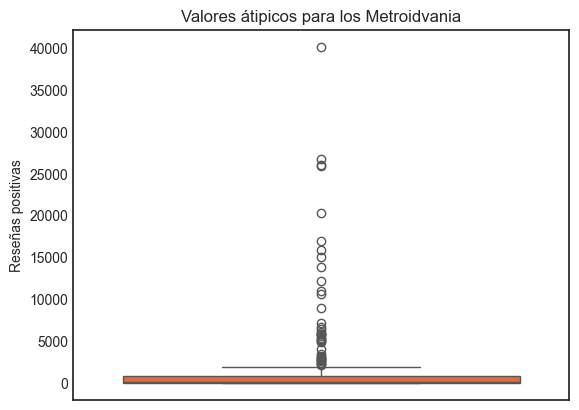

In [43]:
# Boxplot con valores con proporciones reales para encontrar los éxitos rotundos

sns.boxplot(df_metro, y='Positive', color= "#FF5F1F")
plt.title('Valores átipicos para los Metroidvania')
plt.ylabel("Reseñas positivas")

plt.savefig('img/boxplot_metro_1.png', transparent=True, bbox_inches='tight')
plt.show()

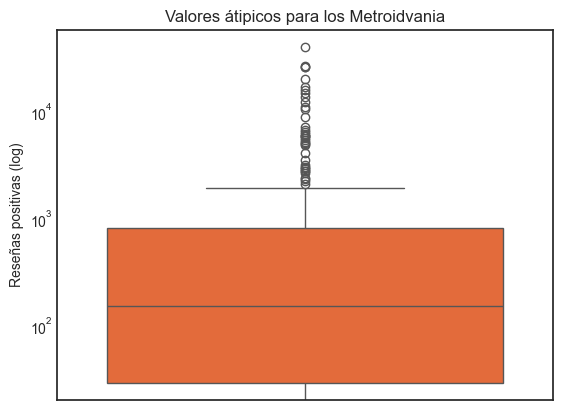

In [44]:
# Boxplot con valores logarítmicos para entender mejor la tendencia

sns.boxplot(df_metro, y='Positive', color= "#FF5F1F")
plt.title('Valores átipicos para los Metroidvania')
plt.ylabel("Reseñas positivas (log)")
plt.yscale('log')

plt.savefig('img/boxplot_metro_2.png', transparent=True, bbox_inches='tight')
plt.show()

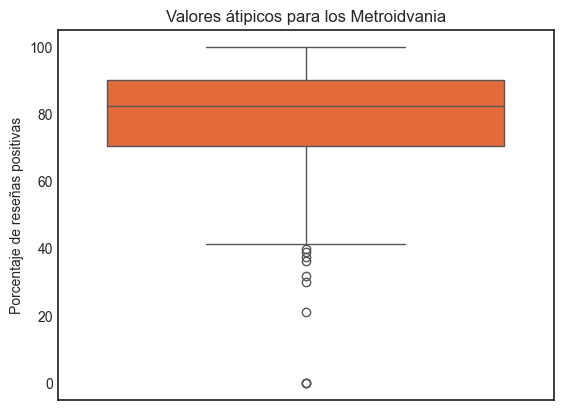

In [45]:
# Boxplot con el porcentaje de reseñas positivas frente a las reseñas totales

sns.boxplot(df_metro, y='Ratio', color= "#FF5F1F")
plt.title('Valores átipicos para los Metroidvania')
plt.ylabel("Porcentaje de reseñas positivas")

plt.savefig('img/boxplot_metro_3.png', transparent=True, bbox_inches='tight')
plt.show()

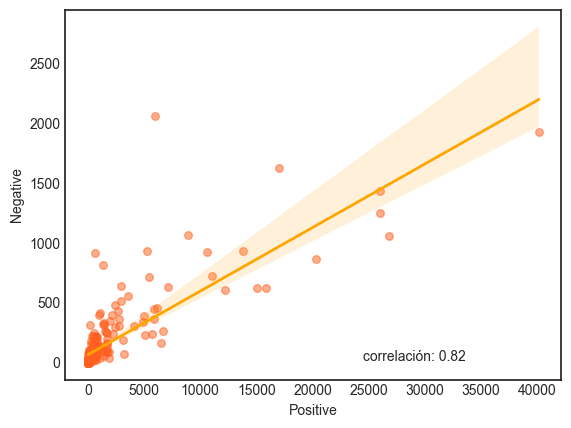

In [46]:
# Scatter para comprobar si a más reseñas positivas, más reseñas negativas

Pearson = df_metro['Positive'].corr(df_metro['Negative'])

sns.regplot(
    data= df_metro,
    x= "Positive",
    y= "Negative",
    color= "#FF5F1F",
    scatter_kws={'alpha': 0.5, 's': 30},
    line_kws={'color': 'orange', 'linewidth': 2}
)

plt.text(
    x= 0.60,
    y= 0.05,
    s= f"correlación: {round(Pearson,2)}",
    transform=plt.gca().transAxes,
)

plt.savefig('img/scatter_metro.png', transparent=True, bbox_inches='tight')
plt.show()

In [47]:
top5_index = df_metro['Positive'].sort_values(ascending=False).head(5).index
df_top5 = df_metro.loc[top5_index, ['Name', 'Positive', 'Release']]
print(df_top5)

                                                  Name  Positive    Release
59554                                    Hollow Knight     40167 2017-02-24
27286                         Ori and the Blind Forest     26776 2015-03-10
120121                                      Dead Cells     26033 2018-08-06
12658   Batman: Arkham City - Game of the Year Edition     25995 2012-09-07
7414    Batman: Arkham Asylum Game of the Year Edition     20297 2010-03-26


In [48]:
# Creo una columna para cada valor de la fecha
df_metro['Year'] = df['Release'].dt.year
df_metro['Month'] = df['Release'].dt.month
df_metro['Day'] = df['Release'].dt.day
df_metro.head(1)

,ID,Name,Tags,Release,Positive,Negative,Price,Ratio,Year,Month,Day
5920,24420,Aquaria,Metroidvania,2008-12-15,1008,133,9.99,88.34,2008,12,15


In [49]:
# Agrupamos los lanzamientos por año
# .value_counts() agrupa
# .sort_index() ordena por años

df_metro_yearly= df_metro["Year"].value_counts().sort_index()
df_metro_yearly

Year
2008     1
2009     2
2010     3
2011     3
2012     8
2013    19
2014    31
2015    30
2016    55
2017    49
2018    55
2019    14
Name: count, dtype: int64

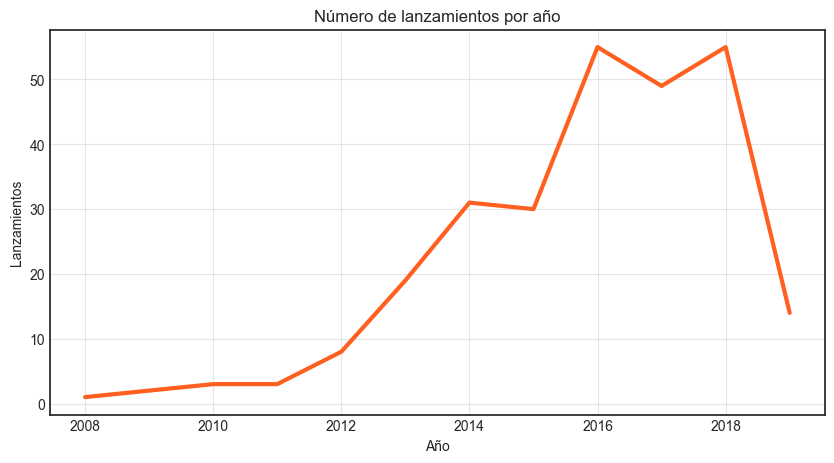

In [56]:
# Gráfico de evolución de lanzamientos por año

plt.figure(figsize=(10,5))

sns.lineplot(
    x= df_metro_yearly.index,
    y= df_metro_yearly.values,
    color= "#FF5F1F",
    linewidth= 3
)

plt.title("Número de lanzamientos por año")
plt.xlabel("Año")
plt.ylabel("Lanzamientos")
plt.grid(alpha=0.5)

#plt.savefig("img/line_metro.png", transparent=True, bbox_inches='tight')
plt.show()

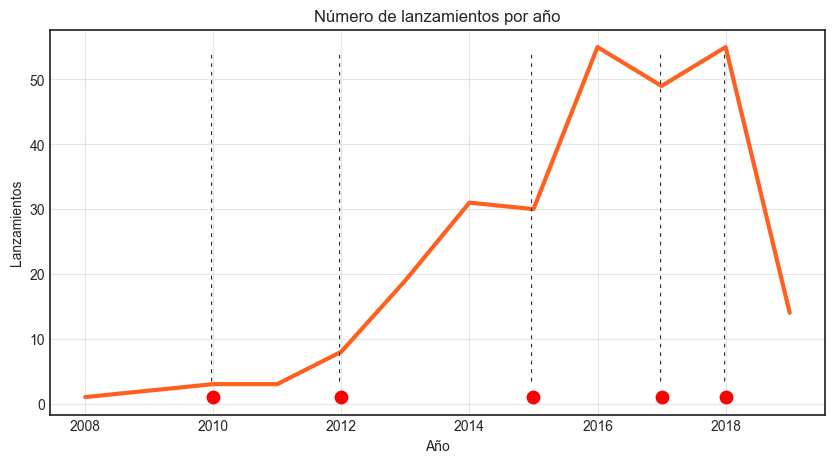

In [55]:
# Gráfico combinado de lanzamientos por año + outliers

plt.figure(figsize=(10,5))

sns.lineplot(
    x= df_metro_yearly.index,
    y= df_metro_yearly.values,
    color= "#FF5F1F",
    linewidth= 3
)

# Acto de fe

plt.scatter(    # Con esto metemos los outliers que hemos sacado
    df_top5['Release'].dt.year,
    df_top5['Positive']/9999999 +1,
    color='red', label='Top 5 Hits', s=80, zorder=3
)

# Vamos a probar una cosa

for i, row in df_top5.iterrows():
    plt.text(
        row["Release"].year,
        row["Positive"]/9999999 +4,
        f"- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -",
        rotation= 90,
        ha= "center",
    )

plt.title("Número de lanzamientos por año")
plt.xlabel("Año")
plt.ylabel("Lanzamientos")
plt.grid(alpha=0.5)


plt.savefig("img/line_metro_2.png", transparent=True, bbox_inches='tight')
plt.show()

## Hipótesis 2: el precio de un juego no implica una mejor recepción (más caro != mejor ?)

#### Empezamos usando aún las métricas del género Metroidvania

Correlación de Pearson para Precio vs Ratio de pos y Precio vs Cantidad de pos  
Aquí buscamos encontrar una correlación entre el precio y la recepción del público

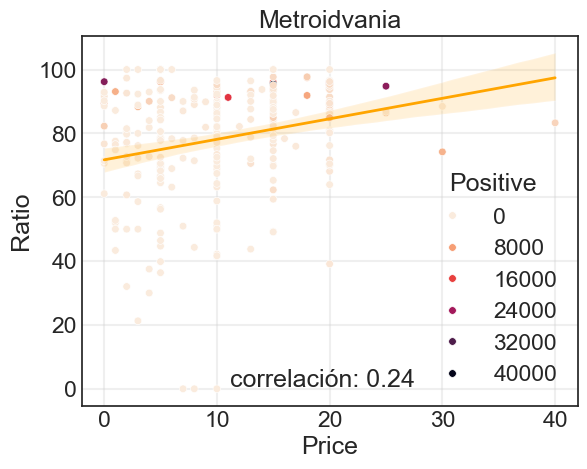

In [ ]:
Pearson_2 = df_metro['Ratio'].corr(df_metro['Price'])

# Hago el scatter por separado para poder cambiar los colores

sns.scatterplot(
    data= df_metro,
    x= "Price",
    y= "Ratio",
    hue= "Positive",    # Parámetro para que los colores cambien
    palette= "rocket_r", # Gama de colores
    #alpha= 0.5,
    s= 30 # Tamaño
)


sns.regplot(
    data= df_metro,
    x= "Price",
    y= "Ratio",
    color= "#FF5F1F",
    scatter= False, # Para quitar los puntos y quedarnos solo con la línea
    line_kws={'color': 'orange', 'linewidth': 2}
)

plt.text(
    x= 0.30,
    y= 0.05,
    s= f"correlación: {round(Pearson_2,2)}",
    transform=plt.gca().transAxes,
)

plt.title("Metroidvania")
plt.grid(alpha= 0.3)

plt.savefig('img/hipo_2_reg_metro.png', transparent=True, bbox_inches='tight')
plt.show()

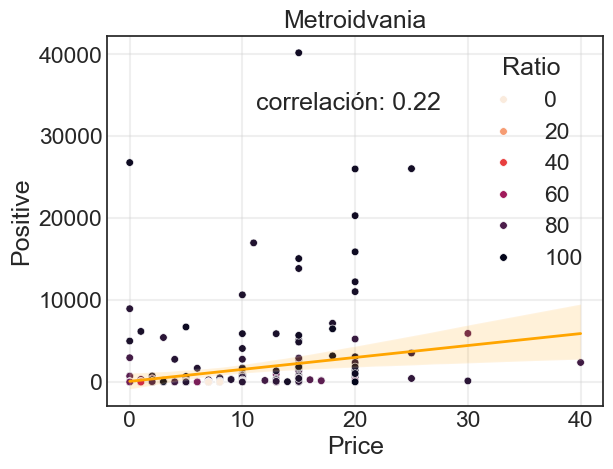

In [ ]:
Pearson_3 = df_metro['Positive'].corr(df_metro['Price'])

# Hago el scatter por separado para poder cambiar los colores

sns.scatterplot(
    data= df_metro,
    x= "Price",
    y= "Positive",
    hue= "Ratio",    # Parámetro para que los colores cambien
    palette= "rocket_r", # Gama de colores
    #alpha= 0.5,
    s= 30 # Tamaño
)


sns.regplot(
    data= df_metro,
    x= "Price",
    y= "Positive",
    color= "#FF5F1F",
    scatter= False, # Para quitar los puntos y quedarnos solo con la línea
    line_kws={'color': 'orange', 'linewidth': 2}
)

plt.text(
    x= 0.30,
    y= 0.80,
    s= f"correlación: {round(Pearson_3,2)}",
    transform=plt.gca().transAxes,
)

plt.title("Metroidvania")
plt.grid(alpha= 0.3)

plt.savefig('img/hipo_2_reg_metro_2.png', transparent=True, bbox_inches='tight')
plt.show()

#### Vamos a hacer lo mismo pero con todos los géneros confundidos

Lo primero va a ser deshacernos de la columna 'Tags' y limpiar los duplicados

In [ ]:
# Creamos el nuevo dataframe sin tags

df_notag= df[["Name", "Release", "Positive", "Negative", "Ratio", "Price"]]
df_notag.head(1)

,Name,Release,Positive,Negative,Ratio,Price
1,Counter-Strike,2000-11-01,124534,3339,97.39,9.99


In [ ]:
# Creamos una columna para el año de lanzamiento, nos puede ser útil

df_notag["Year"]= df_notag["Release"].dt.year
df_notag.head(3)

,Name,Release,Positive,Negative,Ratio,Price,Year
1,Counter-Strike,2000-11-01,124534,3339,97.39,9.99,2000
13,Counter-Strike,2000-11-01,124534,3339,97.39,9.99,2000
15,Counter-Strike,2000-11-01,124534,3339,97.39,9.99,2000


In [ ]:
# Eliminamos los duplicados

df_notag.drop_duplicates(inplace= True)
df_notag.head(3)

,Name,Release,Positive,Negative,Ratio,Price,Year
1,Counter-Strike,2000-11-01,124534,3339,97.39,9.99,2000
21,Team Fortress Classic,1999-04-01,3318,633,83.98,4.99,1999
40,Day of Defeat,2003-05-01,3416,398,89.56,4.99,2003


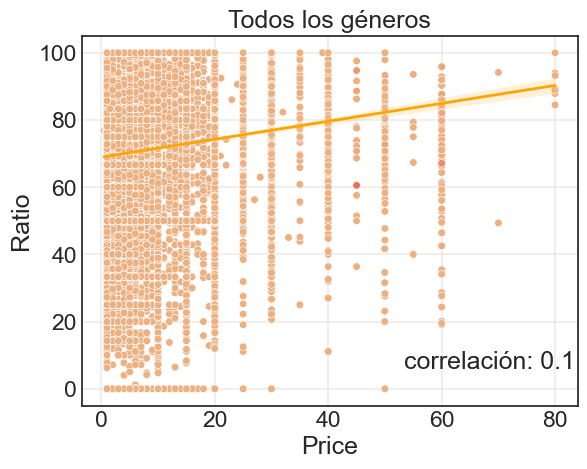

In [ ]:
# Scatterplot con línea de regresión para sacar correlación de Pearson: precio vs porcentaje de reseñas positivas

df_not_free= df_notag[df_notag["Price"] > 0].dropna(subset=['Ratio']) # El subset borra cualquier posible fila sin valor para el 'Ratio'

Pearson_4= df_not_free["Price"].corr(df_not_free["Ratio"])

sns.scatterplot(
    data= df_not_free,
    x= "Price",
    y= "Ratio",
    hue= "Positive",
    palette= "flare",
    s= 30
)

sns.regplot(
    data= df_not_free,
    x= "Price",
    y= "Ratio",
    color= "#FF5F1F",
    scatter= False,
    line_kws={"color": "orange", "linewidth": 2}
)

plt.text(
    x= 0.65,
    y= 0.1,
    s= f"correlación: {round(Pearson_4,2)}",
    transform=plt.gca().transAxes,
)

plt.legend("")
plt.title("Todos los géneros")
plt.grid(alpha= 0.3)

plt.savefig('img/hipo_2_reg_total.png', transparent=True, bbox_inches='tight')
plt.show()

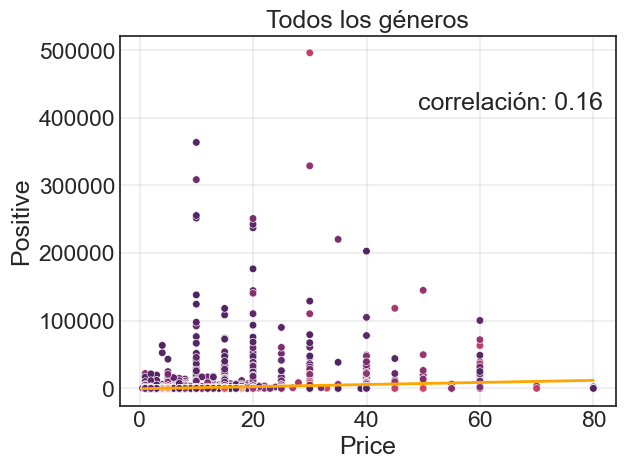

In [ ]:
# Mismo scatter con reg pero para Pearson: precio vs cantidad de reseñas positivas

Pearson_5= df_not_free["Price"].corr(df_not_free["Positive"])

sns.scatterplot(
    data= df_not_free,
    x= "Price",
    y= "Positive",
    hue= "Ratio",
    palette= "flare",
    s= 30
)

sns.regplot(
    data= df_not_free,
    x= "Price",
    y= "Positive",
    color= "#FF5F1F",
    scatter= False,
    line_kws={"color": "orange", "linewidth": 2}
)

plt.text(
    x= 0.6,
    y= 0.8,
    s= f"correlación: {round(Pearson_5,2)}",
    transform=plt.gca().transAxes,
)

plt.legend("")
plt.title("Todos los géneros")
plt.grid(alpha= 0.3)

plt.savefig('img/hipo_2_reg_total_2.png', transparent=True, bbox_inches='tight')
plt.show()

## Hipótesis 3: El precio de los juegos ha subido a lo largo de los años

Bastante popular opinion aquí, pero que hay de los juegos F2P?

In [ ]:
# Agrupamos los lanzamientos totales por año
# Sacamos la medio de precios por año
# .sort_index() ordena por años

df_notag_yearly= df_notag.groupby("Year")["Price"].mean().sort_index()
df_notag_yearly.head()

Year
1997     9.99
1998     9.99
1999     4.99
2000     7.49
2001    12.49
Name: Price, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

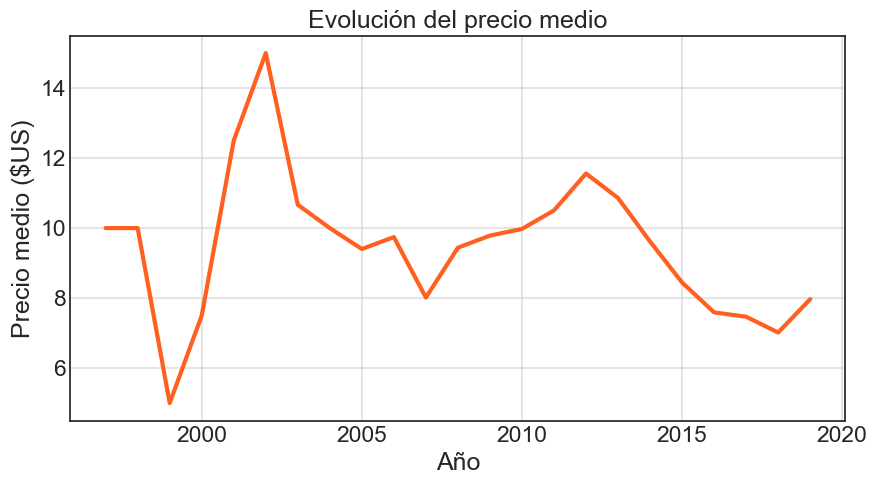

In [ ]:
# Lineplot con la evolución del precio medio de los juegos por año

plt.figure(figsize=(10,5))

sns.lineplot(
    x= df_notag_yearly.index,
    y= df_notag_yearly.values,
    linewidth= 3,
    color= "#FF5F1F"
)


plt.title("Evolución del precio medio")
plt.xlabel("Año")
plt.ylabel("Precio medio ($US)")
plt.grid(alpha=0.5)

plt.savefig('img/hipo_3_line_pago.png', transparent=True, bbox_inches='tight')
plt.show

#### Vamos a ver como evolucionan los juegos gratuitos

A ver si nos están rompiendo las métricas

In [ ]:
# Cogemos todos los juegos con un precio igual a 0.00

df_notag_free= df_notag[df_notag["Price"]== 0.00]
df_notag_free.head()

,Name,Release,Positive,Negative,Ratio,Price,Year
253,Half-Life 2: Lost Coast,2005-10-27,5783,1020,85.01,0.0,2005
341,Team Fortress 2,2007-10-10,515879,34036,93.81,0.0,2007
401,Dota 2,2013-07-09,863507,142079,85.87,0.0,2013
441,Alien Swarm,2010-07-19,17435,941,94.88,0.0,2010
461,Counter-Strike: Global Offensive,2012-08-21,2644404,402313,86.80,0.0,2012


In [ ]:
# Agrupamos los valores por año

df_free_yearly= df_notag_free["Year"].value_counts().sort_index()
df_free_yearly

Year
2005      1
2006      2
2007      6
2008      9
2009      9
2010     15
2011     17
2012     26
2013     40
2014    123
2015    253
2016    495
2017    632
2018    865
2019    261
Name: count, dtype: int64

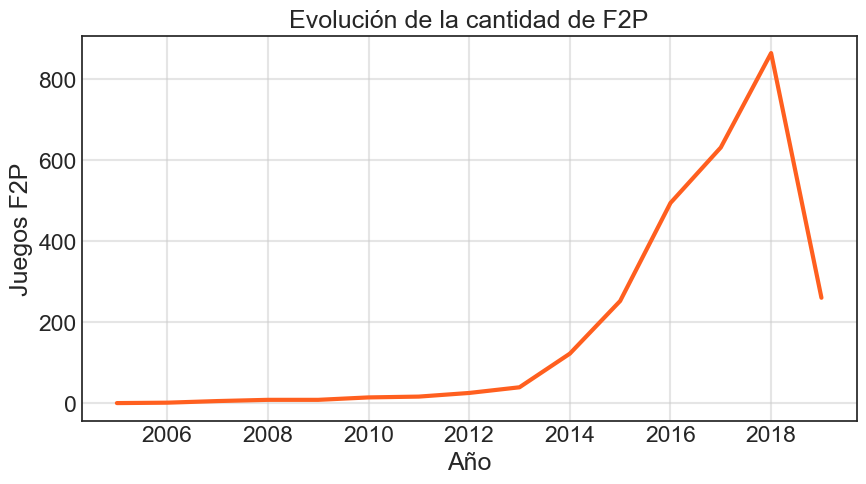

In [ ]:
# Histplot para ver la cantidad de juegos F2P que se han publicado cada año
# Con la curba de tendencia esa que está bien chula

plt.figure(figsize=(10,5))

sns.lineplot(
    x= df_free_yearly.index,
    y= df_free_yearly.values,
    color= "#FF5F1F",
    linewidth= 3
)

plt.title("Evolución de la cantidad de F2P")
plt.xlabel("Año")
plt.ylabel("Juegos F2P")
plt.grid(alpha=0.5)

plt.savefig('img/hipo_3_line_gratis.png', transparent=True, bbox_inches='tight')
plt.show()

## Hipótesis 4: La oferta no corresponde con la demanda

¿Hasta que punto los géneros más publicados no son los más jugados y vice versa?

In [ ]:
# Hacemos un conteo de veces que aparecen nuestras etiquetas en el dataframe

df_tag_count = df['Tags'].value_counts(ascending=True).reset_index()
df_tag_count

,Tags,count
0,Souls-like,57
1,MOBA,113
2,MMORPG,196
3,Metroidvania,270
4,Third-Person Shooter,333
5,JRPG,409
6,Hack and Slash,414
7,Rogue-lite,469
8,Racing,1129
9,Survival,1314


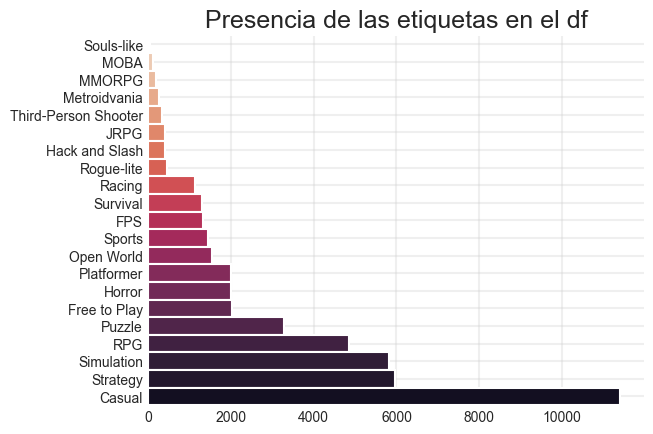

In [ ]:
# Mostramos la cantidad de veces que aparece cada etiqueta en el dataframe

sns.barplot(
    x= "count",
    y= "Tags",
    data= df_tag_count,
    orient= "h",
    palette= "rocket_r",
    width=1
)

sns.despine(bottom= True, left= True)

plt.title("Presencia de las etiquetas en el df")
plt.xlabel("")
plt.ylabel("")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10) # Para reducir el tamaño de las etiquetas

plt.grid(alpha= 0.3)

plt.savefig('img/hipo_4_bar_etiquetas.png', transparent=True, bbox_inches='tight')
plt.show()

In [ ]:
# Creo una columna de número de reseñas totales
# Al parecer estos .fillna() cambian los valores na por 0
# No deberián haber entradas vacías pero por si acaso

df['Tot_review'] = df['Positive'].fillna(0) + df['Negative'].fillna(0)
df.head(5)

,ID,Name,Tags,Release,Positive,Negative,Price,Ratio,Tot_review
1,10,Counter-Strike,FPS,2000-11-01,124534,3339,9.99,97.39,127873
13,10,Counter-Strike,Strategy,2000-11-01,124534,3339,9.99,97.39,127873
15,10,Counter-Strike,Survival,2000-11-01,124534,3339,9.99,97.39,127873
21,20,Team Fortress Classic,FPS,1999-04-01,3318,633,4.99,83.98,3951
40,30,Day of Defeat,FPS,2003-05-01,3416,398,4.99,89.56,3814


In [ ]:
# Agrupamos todas las reseñas por etiquetas

df_tag_resenas = df.groupby('Tags')['Tot_review'].sum().sort_values(ascending=False).reset_index()
df_tag_resenas.head()

,Tags,Tot_review
0,Strategy,14052172
1,FPS,13780784
2,Open World,12594818
3,RPG,10873302
4,Simulation,10503204


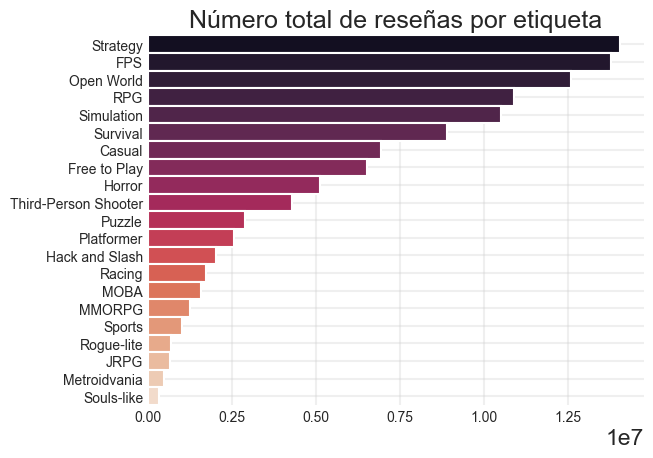

In [ ]:
# Barplot del número total de reseñas por etiqueta, al réves que el otro barplot porque ¿por qué no?

sns.barplot(
    data= df_tag_resenas,
    x= "Tot_review",
    y= "Tags",
    palette= "rocket",
    orient= "h", # esto no sé si está cambiando algo o no...
    width= 1
)

sns.despine(bottom= True, left= True)

plt.title("Número total de reseñas por etiqueta")
plt.xlabel("")
plt.ylabel("")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10) # Para reducir el tamaño de las etiquetas

plt.grid(alpha= 0.3)

plt.savefig('img/hipo_4_bar_resenas.png', transparent=True, bbox_inches='tight')
plt.show()

## Pregunta: ¿Cuáles son los géneros que más se combinan?

La razón es simple: los heatmaps molan.

In [ ]:
# Aquí ya he tirado de ChatGPT porque se me complicaba la cosa
# Al parecer al tener la info en formato en texto y en una solo columna, tengo que hacer unas cuantas transformaciones

df_hm= df[["Name", "Tags"]]
df_hm= df_hm.groupby("Name")["Tags"].apply(lambda x: list(set(x))).reset_index()
df_hm

,Name,Tags
0,Fieldrunners 2,"[Strategy, Casual]"
1,! That Bastard Is Trying To Steal Our Gold !,[Casual]
2,!AnyWay!,"[Platformer, Casual]"
3,!LABrpgUP!,"[RPG, Casual]"
4,"""BUTTS: The VR Experience""","[Casual, Horror]"
...,...,...
23892,黑暗料理?!,"[Simulation, Strategy, Casual]"
23893,龙魂时刻,"[Free to Play, RPG, MMORPG]"
23894,신기록 : A Compendium of Ghosts,"[Free to Play, RPG, Casual]"
23895,암전:Blackout,"[Horror, Survival]"


In [ ]:
df_hm['Tags'].head().apply(print)

['Strategy', 'Casual']
['Casual']
['Platformer', 'Casual']
['RPG', 'Casual']
['Casual', 'Horror']


0    None
1    None
2    None
3    None
4    None
Name: Tags, dtype: object

In [ ]:
# Convertimos a variables binarias

mlb = MultiLabelBinarizer()

df_heatmap = pd.DataFrame(
    mlb.fit_transform(df_hm['Tags']),
    columns=mlb.classes_,
    index=df_hm['Name']
)

df_heatmap.head(5)

,Casual,FPS,Free to Play,Hack and Slash,Horror,JRPG,MMORPG,MOBA,Metroidvania,Open World,...,Puzzle,RPG,Racing,Rogue-lite,Simulation,Souls-like,Sports,Strategy,Survival,Third-Person Shooter
Name,,,,,,,,,,,,,,,,,,,,,
Fieldrunners 2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
! That Bastard Is Trying To Steal Our Gold !,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
!AnyWay!,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
!LABrpgUP!,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
"""BUTTS: The VR Experience""",1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Calculamos la matriz de coocurrencia (?)

matriz_heatmap = df_heatmap.T.dot(df_heatmap)
matriz_heatmap.head(5)

,Casual,FPS,Free to Play,Hack and Slash,Horror,JRPG,MMORPG,MOBA,Metroidvania,Open World,...,Puzzle,RPG,Racing,Rogue-lite,Simulation,Souls-like,Sports,Strategy,Survival,Third-Person Shooter
Casual,11405,202,832,55,499,93,43,27,34,325,...,2017,1248,439,80,2737,7,682,2416,308,40
FPS,202,1333,210,17,288,7,27,17,2,314,...,63,187,29,34,226,2,39,217,292,88
Free to Play,832,210,2023,39,200,13,136,72,5,252,...,121,479,71,11,458,2,115,551,161,49
Hack and Slash,55,17,39,414,20,46,27,7,21,81,...,16,267,0,36,16,17,3,47,26,13
Horror,499,288,200,20,2015,7,11,4,22,207,...,461,267,17,27,266,9,14,192,387,48


In [ ]:
# Esta parte crea la escala de -1 a 1

scaler = MinMaxScaler(feature_range=(-1, 1))
matriz_scaled = pd.DataFrame(
    scaler.fit_transform(matriz_heatmap),
    columns=matriz_heatmap.columns,
    index=matriz_heatmap.index
)

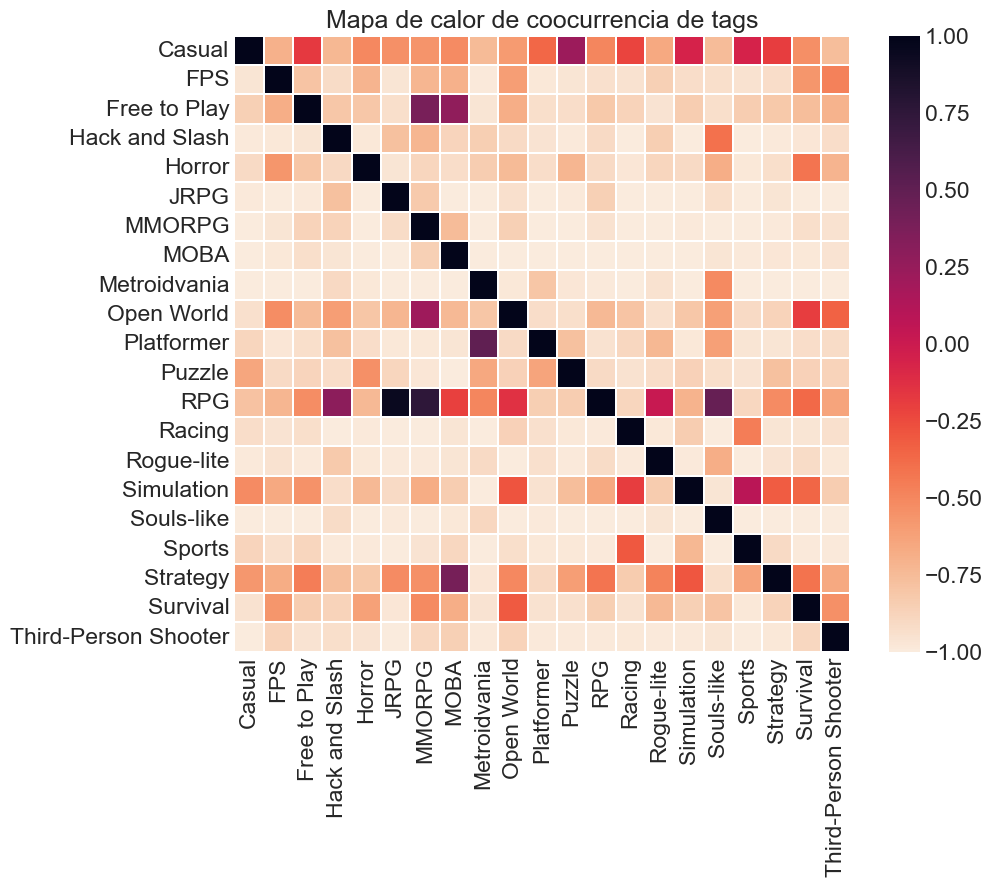

In [ ]:
# Montamos un mapa de calor

plt.figure(figsize=(10,8))
sns.heatmap(
    matriz_scaled,
    cmap='rocket_r',
    square=True,
    linewidths= 0.01,
)

sns.despine(bottom= True, left= True)

plt.title('Mapa de calor de coocurrencia de tags')

plt.savefig('img/hipo_5_heatmap.png', transparent=True, bbox_inches='tight')
plt.show()

# Fin